## Import

In [1]:
# Импортируем наши стандартные библиотеки
from copy import deepcopy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

## Data

In [2]:
# Мы будем использовать датасет для красных вин, которые лежат по ссылке
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# Считаем данные по ссылки при помощи метода read_csv библиотеки pandas и дополнительно укажем в качестве разделения в данных (sep) символ ";"

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Разделим данные на признаки и таргет

X = df.drop(columns=["quality"])
y = df["quality"]

## EDA

#### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)

#### Pairplot

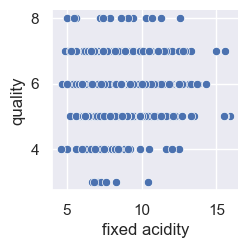

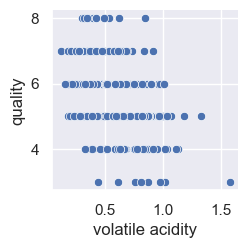

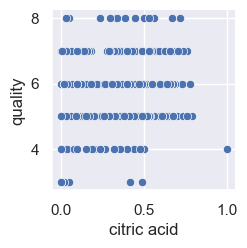

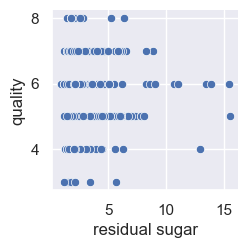

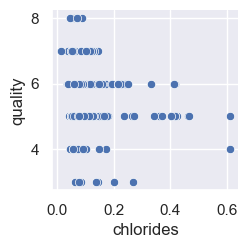

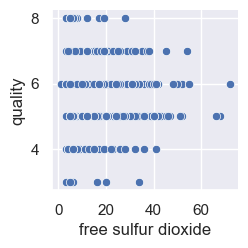

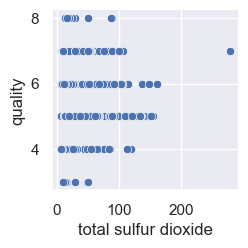

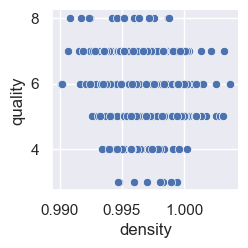

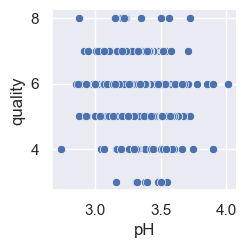

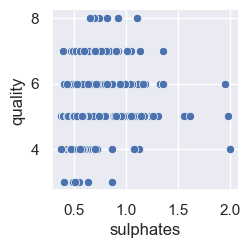

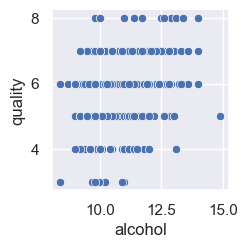

In [8]:
# Построим график зависимости оценки вина от каждого из признаков на обучающей части
X_train_plot = deepcopy(X_train)
X_train_plot["quality"] = y_train

for i in X_train.columns:
    sns.pairplot(X_train_plot,x_vars=i,y_vars=["quality"], height=2.5)

plt.show()

## Model

#### Decision Tree Regressor

In [9]:
# Создадим объект класса DecisionTreeRegressor с параметрами по умолчанию
DTR = DecisionTreeRegressor()

# Обучим его на обучающей части датасета при помощи метода fit
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
y_DTR_train_predict = DTR.predict(X_train)
y_DTR_test_predict = DTR.predict(X_test)

In [11]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_DTR_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_DTR_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_DTR_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_DTR_test_predict)}")

TRAIN
MAX ERROR: 0.0
MAE:       0.0
TEST
MAX ERROR: 4.0
MAE:       0.465


In [12]:
# Создадим объект класса DecisionTreeRegressor с max_depth равным числу (например 5)
DTR = DecisionTreeRegressor(max_depth=5)

# Обучим его на обучающей части датасета при помощи метода fit
DTR.fit(X_train, y_train)

# Получим предсказание нашего дерева при помощи метода predict на обучающем и тестовом датасете
y_DTR_train_predict = DTR.predict(X_train)
y_DTR_test_predict = DTR.predict(X_test)

# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_DTR_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_DTR_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_DTR_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_DTR_test_predict)}")

TRAIN
MAX ERROR: 2.2442396313364057
MAE:       0.4496686336604965
TEST
MAX ERROR: 3.0
MAE:       0.5159367042205742


#### GridSearch

In [13]:
param_grid = {'max_depth': range(1, 8),'min_samples_leaf': range(1, 8),}
grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, return_train_score=True, verbose=4, cv=2)

In [14]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 49 candidates, totalling 98 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=4)

In [15]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid.best_score_}")
print(f"Лучшие параметры: {grid.best_params_}")

Лучшая метрика:   -0.5370063789067776
Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 7}


In [16]:
# Получим предсказание нашего лучшего дерева (хранится в best_estimator_) при помощи метода predict на обучающем и тестовом датасете
y_GS_train_predict = grid.best_estimator_.predict(X_train)
y_GS_test_predict = grid.best_estimator_.predict(X_test)

# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_GS_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_GS_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_GS_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_GS_test_predict)}")

TRAIN
MAX ERROR: 2.2075471698113205
MAE:       0.4565740587888266
TEST
MAX ERROR: 2.7142857142857144
MAE:       0.501055283045756


#### Plot tree

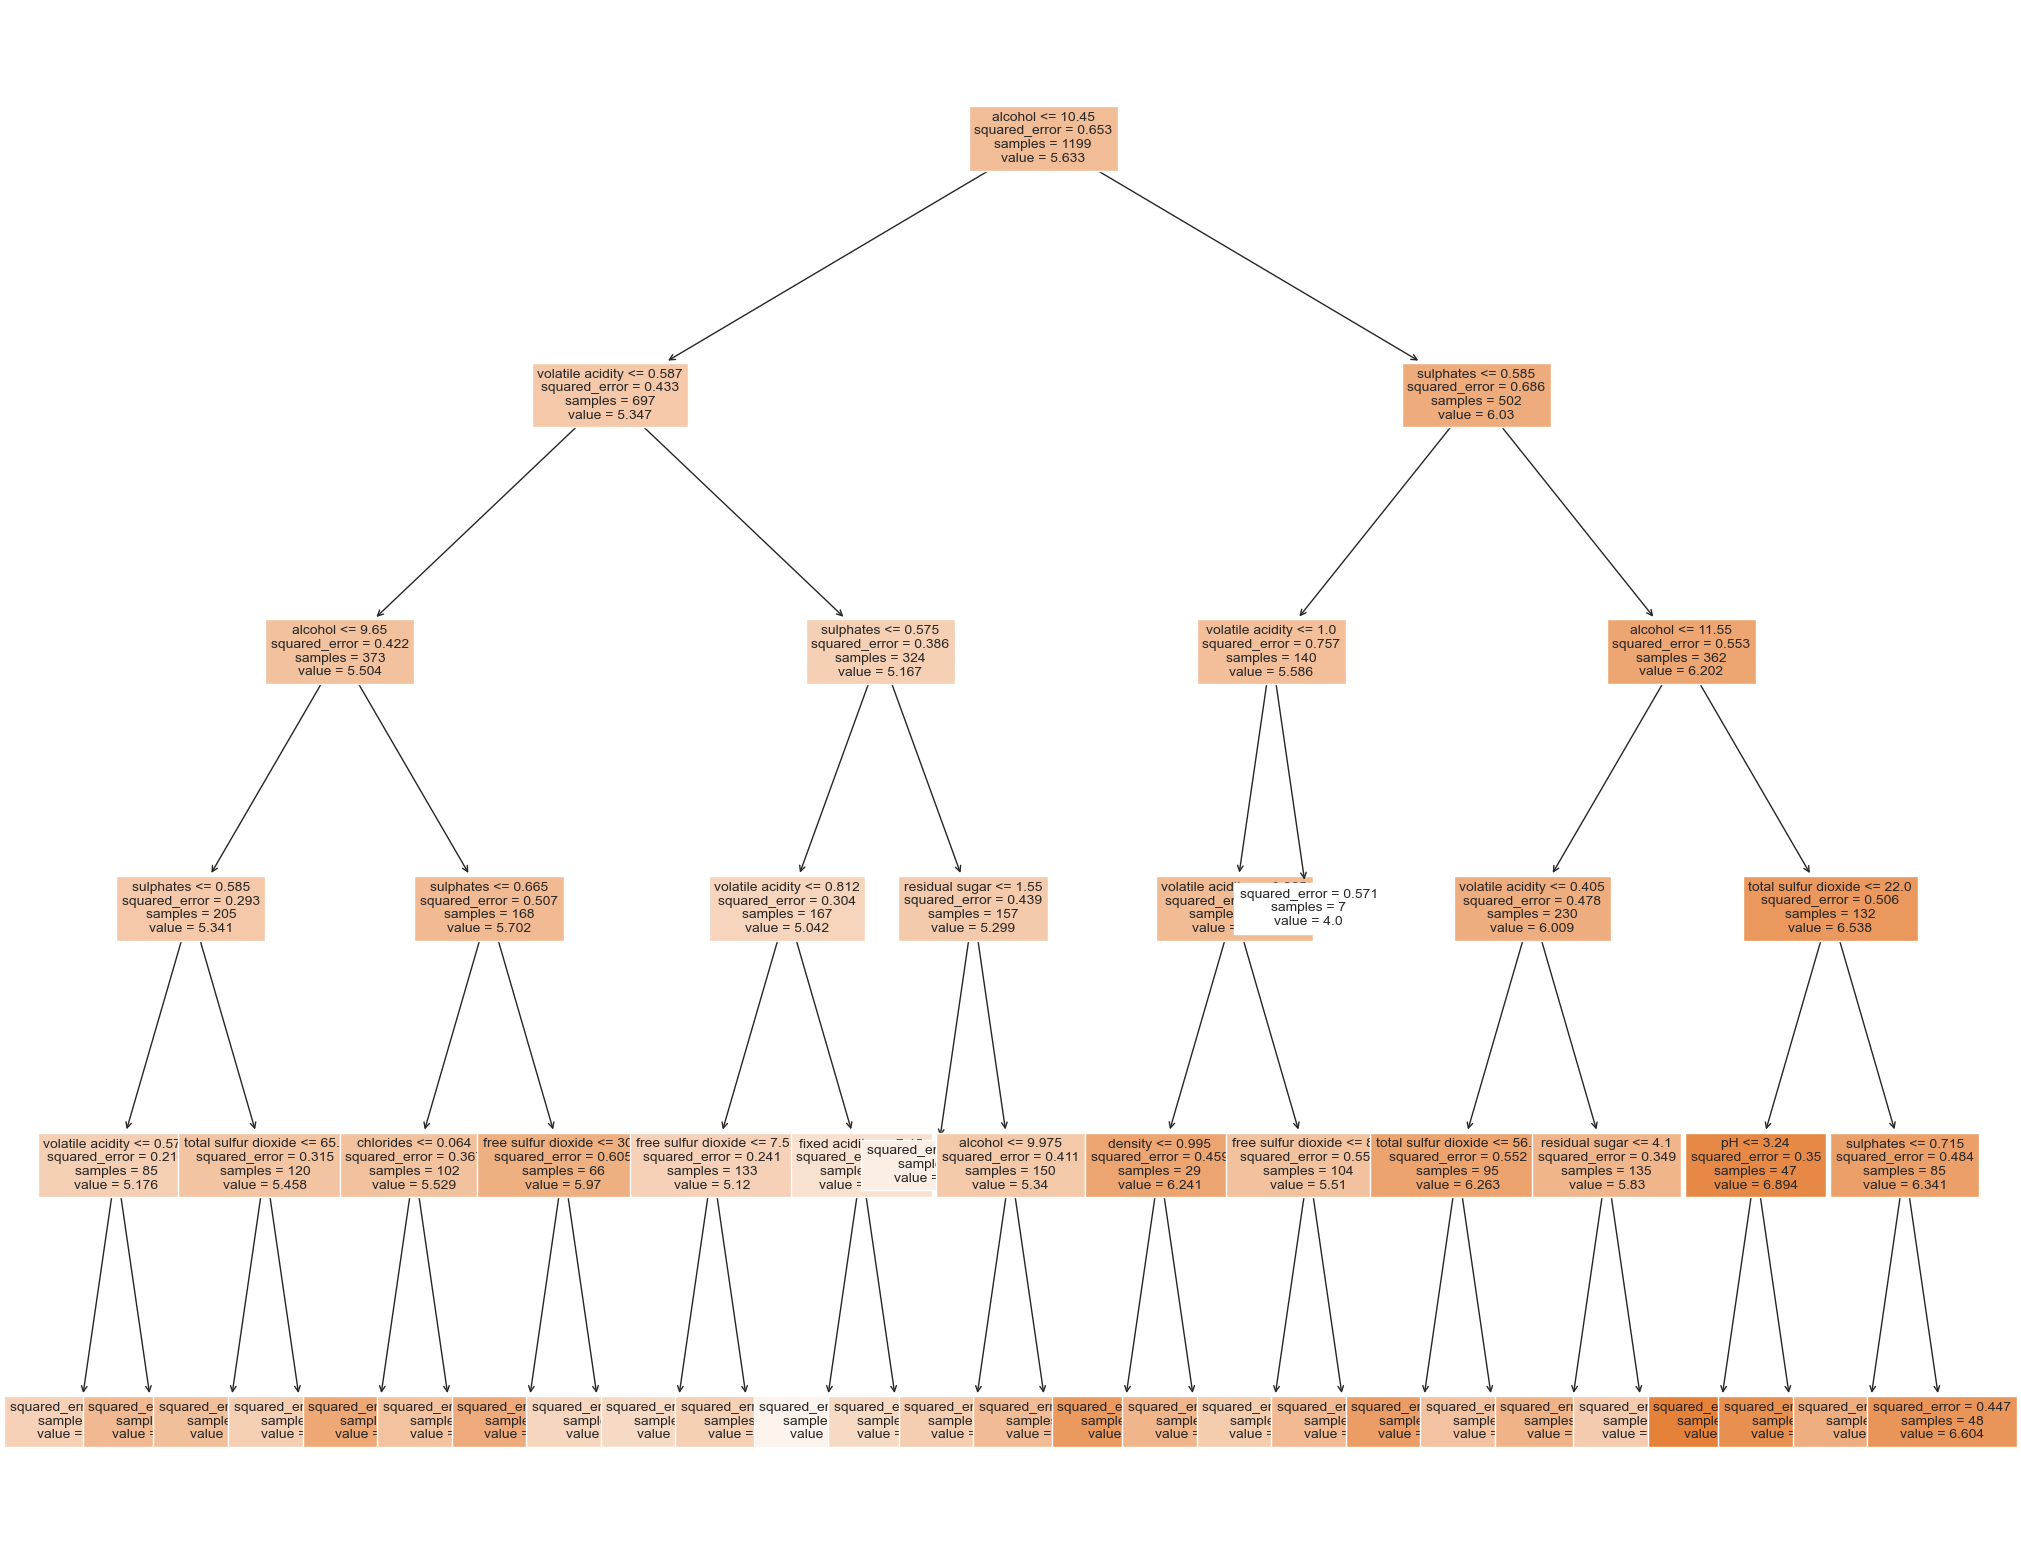

In [17]:
fig = plt.figure(figsize=(25,20))

_ = plot_tree(
        grid.best_estimator_, 
        feature_names = X_train.columns,  
        class_names = y_train.name,
        filled = True,
        fontsize = 10
    )

#### Random Forest

In [18]:
# Создадим объект класса RandomForestRegressor с параметрами по умолчанию
RFR = RandomForestRegressor()

# Обучим его на обучающей части датасета при помощи метода fit
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# Получим предсказание нашего случайного леса при помощи метода predict на обучающем и тестовом датасете
y_RFR_train_predict = RFR.predict(X_train)
y_RFR_test_predict = RFR.predict(X_test)

In [20]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_RFR_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_RFR_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_RFR_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_RFR_test_predict)}")

TRAIN
MAX ERROR: 1.0499999999999998
MAE:       0.16122602168473726
TEST
MAX ERROR: 2.3899999999999997
MAE:       0.38732500000000003


#### GridSearch

In [21]:
param_distributions = {'max_depth': range(6, 20),'min_samples_split': range(2, 9),'max_features': range(2, 11)}
grid = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_distributions, scoring='neg_mean_absolute_error', n_jobs=-1, n_iter=16, verbose=5, return_train_score=True, cv=3)

In [22]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=16,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(6, 20),
                                        'max_features': range(2, 11),
                                        'min_samples_split': range(2, 9)},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=5)

In [23]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid.best_score_}")
print(f"Лучшие параметры: {grid.best_params_}")

Лучшая метрика:   -0.46138554027250067
Лучшие параметры: {'min_samples_split': 4, 'max_features': 5, 'max_depth': 19}


In [24]:
# Получим предсказание нашего лучшего дерева (хранится в best_estimator_) при помощи метода predict на обучающем и тестовом датасете
y_GS_train_predict = grid.best_estimator_.predict(X_train)
y_GS_test_predict = grid.best_estimator_.predict(X_test)

# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_GS_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_GS_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_GS_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_GS_test_predict)}")

TRAIN
MAX ERROR: 1.1430476190476186
MAE:       0.1873057031826739
TEST
MAX ERROR: 2.535166666666666
MAE:       0.4057063918299977
